In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [68]:
# x = np.load('data/x.npy')
# y = np.load('data/y.npy')

# features = np.array(x)
# features = StandardScaler().fit_transform(features)
# targets = np.array(y)
# # , 1:'ClassB', 2:'ClassC', 3:'ClassD'
# print(features.shape)
# np.max(features)

(4500, 40)


5.223928986733506

# Change the Data

In [69]:
X = pd.DataFrame(np.load('data/x.npy'))
Y = pd.DataFrame(np.load('data/y.npy'))

In [70]:
df = pd.concat([X, Y.rename(columns={0:40})],axis=1)

In [71]:
features = pd.DataFrame(X)
features.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.023235,0.007021,0.011754,-0.003095,0.013149,-0.020422,0.009327,0.001103,-0.021455,-0.006206,...,-0.001518,-0.011286,-0.001946,-0.015873,-0.008468,0.017861,-0.009448,0.021053,0.002734,0.009441
std,1.011441,1.009557,1.002300,1.011032,0.981847,1.009492,0.992947,1.540690,0.988098,1.012960,...,2.364159,1.013165,1.581581,1.001157,0.979978,0.985624,1.003803,1.006739,1.554479,0.987810
min,-3.419822,-3.271209,-4.652939,-3.746419,-4.039535,-4.409496,-4.183708,-6.510460,-3.995664,-3.594089,...,-8.231544,-3.659713,-5.043048,-3.694611,-4.238773,-3.163876,-3.730627,-3.429746,-5.406026,-3.936520
25%,-0.662904,-0.661335,-0.651217,-0.689380,-0.639004,-0.688032,-0.643981,-1.085360,-0.678617,-0.685901,...,-1.487367,-0.705141,-1.129620,-0.675682,-0.657452,-0.635898,-0.684310,-0.663322,-1.112748,-0.662121
50%,-0.001780,0.004024,-0.001247,0.008359,-0.003625,-0.018222,-0.009191,-0.187166,-0.033956,0.017288,...,-0.045709,-0.033666,-0.047074,0.003345,-0.021129,-0.007427,-0.012452,0.021610,0.034374,0.002324
75%,0.713487,0.692120,0.689407,0.684995,0.668438,0.672323,0.690023,1.071335,0.662741,0.688522,...,1.435304,0.674686,1.087459,0.670581,0.667430,0.679187,0.666872,0.716877,1.157032,0.670007
max,3.515532,3.812285,3.734947,3.586487,3.696180,3.095314,3.475050,6.780067,3.236335,3.992827,...,10.505966,3.999207,5.634102,3.218922,3.210290,3.520070,3.735699,3.746542,4.361083,3.183437


In [72]:
Y.value_counts()

2    1129
1    1124
3    1124
0    1123
Name: count, dtype: int64

In [74]:
targets = Y.replace({0:'ClassA', 1:'ClassB', 2:'ClassC', 3:'ClassD'})

In [75]:
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.25, random_state=0)

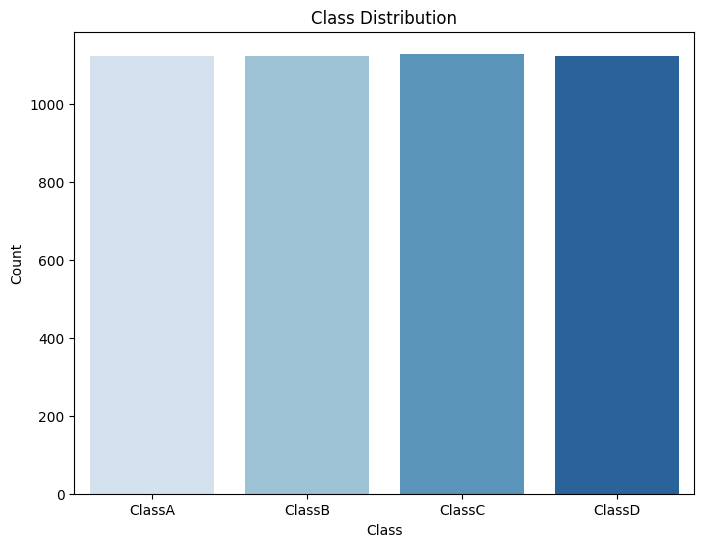

In [76]:
# class distribution of the target
values, counts = np.unique(targets, return_counts=True)
# Create a bar chart to visualize the distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=values, y=counts, palette='Blues')
# sns.displot(targets, palette='Blues', kind='kde')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Since the data is balanced so gini which is more sensitive it doesn't make any difference

In [77]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=0)

# What are we going to do?

So we are going to find the best hyperparameters based on each hyperparameter of criterion

# GINI

## Splitter


In [78]:
# accuracy
accuracy_rate = []
split_class = ['best', 'random']
for i in split_class:
    clf = DecisionTreeClassifier(criterion='gini', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append('{:.2f}'.format(accuracy_score(y_test, pred)))



# precision
precision_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='gini', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append('{:.2f}'.format(precision_score(y_test, pred, average='macro')))




# recall
recall_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='gini', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append('{:.2f}'.format(recall_score(y_test, pred, average='macro')))

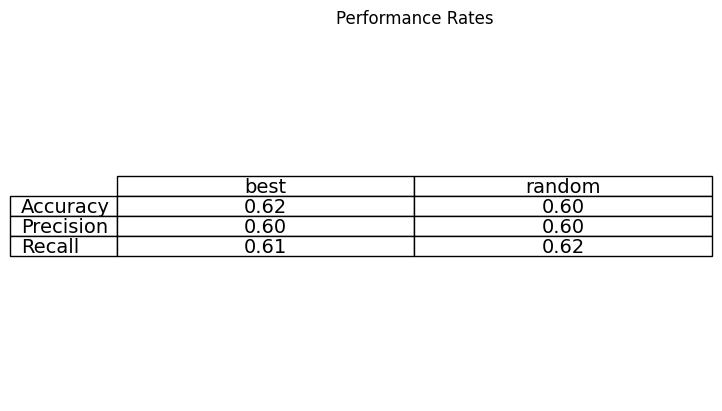

In [79]:
score_types = ['Accuracy', 'Precision', 'Recall']

# Create the table
data = [accuracy_rate, precision_rate, recall_rate]

table = plt.table(cellText=data, colLabels=split_class, rowLabels=score_types, loc='center', cellLoc='center')

# Table formatting
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

# Removing axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Removing borders
for sp in ax.spines.values():
    sp.set_visible(False)

# Table title
plt.title('Performance Rates')

plt.show()

### so the best score for the splitter is 'best'

## max_depth

In [80]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))


C:\Users\mojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


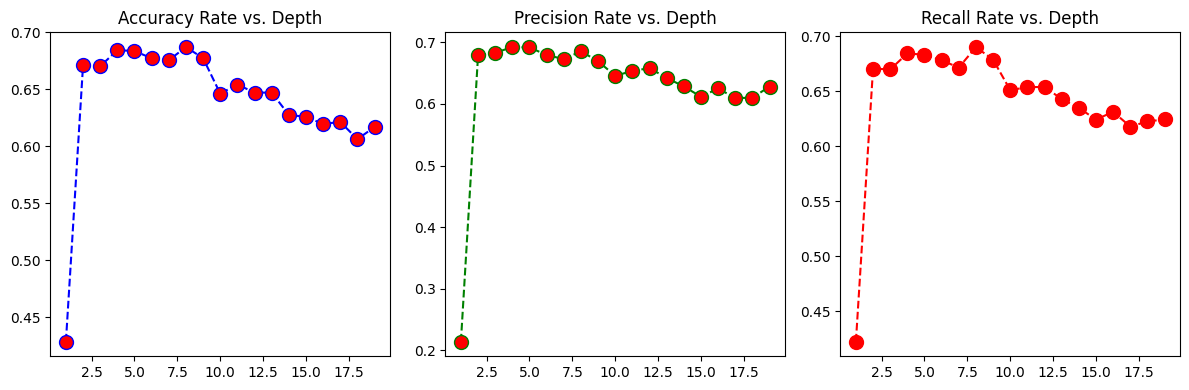

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Depth')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Depth')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Depth')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [82]:
print(f'max_depth {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_depth {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'max_depth {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')

best_max_depth = np.argmax(accuracy_rate)
if best_max_depth == 0:
    max_depth = np.argsort(accuracy_rate)[1]
    print(max_depth)

max_depth 7 with accuracy rate of 0.6871111111111111
max_depth 3 with precision rate of 0.6923263640926921
max_depth 7 with recall rate of 0.6903672618137047


### the best max_depth is 7

## max_features int, float or {“auto”, “sqrt”, “log2”}, default=None

In [83]:
# accuracy
accuracy_rate = []
max_features = ['sqrt', 'log2']
for i in max_features:
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))



# precision
precision_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

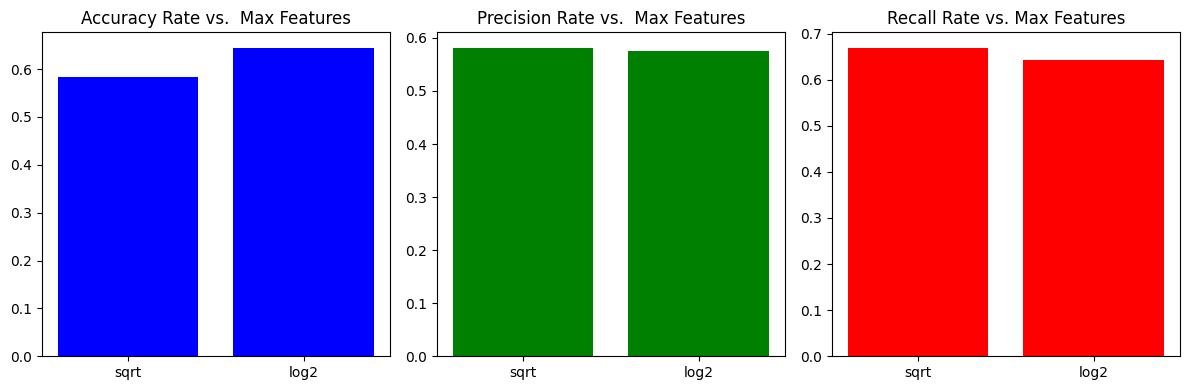

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].bar(max_features, accuracy_rate, color='blue')
axes[0].set_title('Accuracy Rate vs.  Max Features')

# Plot the second bar plot on the second subplot
axes[1].bar(max_features, precision_rate, color='green')
axes[1].set_title('Precision Rate vs.  Max Features')

# Plot the third bar plot on the third subplot
axes[2].bar(max_features, recall_rate, color='red')
axes[2].set_title('Recall Rate vs. Max Features')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [85]:
print(f'max_features {max_features[np.argmax(accuracy_rate)]} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_features {max_features[np.argmax(precision_rate)]} with precision rate of {np.max(precision_rate)}')
print(f'max_features {max_features[np.argmax(recall_rate)]} with recall rate of {np.max(recall_rate)}')
best_max_features = max_features[np.argmax(accuracy_rate)]

max_features log2 with accuracy rate of 0.6444444444444445
max_features sqrt with precision rate of 0.5814647241997675
max_features sqrt with recall rate of 0.6691637659173048


### min_samples_leaf

In [87]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

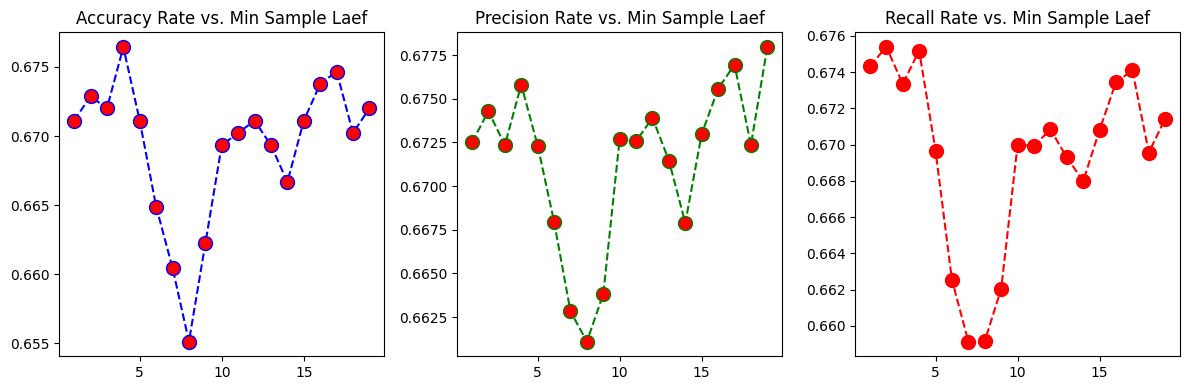

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Min Sample Laef')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Min Sample Laef')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Min Sample Laef')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
print(f'min_sample_leaf {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'min_sample_leaf {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'min_sample_leaf {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')
best_min_samples_leaf = np.argmax(accuracy_rate)
if best_min_samples_leaf == 0:
    best_min_samples_leaf = 1

min_sample_leaf 3 with accuracy rate of 0.6764444444444444
min_sample_leaf 18 with precision rate of 0.6779554256892718
min_sample_leaf 1 with recall rate of 0.6753770076084816


In [90]:
clf = DecisionTreeClassifier(criterion='gini', splitter=best_splitter, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_score(y_test, pred)

NameError: name 'best_splitter' is not defined

We can see the best max_depth belongs to 4

# Entropy

In [91]:
# criterion = gini
clf = DecisionTreeClassifier(criterion='entropy',splitter='best')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.64

In [92]:
# max_depth
clf = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6568888888888889

In [93]:
# max_depth
clf = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=15)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6497777777777778

In [94]:
# max_depth
clf = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6755555555555556

In [95]:
# splitter
clf = DecisionTreeClassifier(criterion='entropy',splitter='random')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6035555555555555

In [96]:
# max_depth
clf = DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6462222222222223

### splitter

In [97]:
# accuracy
accuracy_rate = []
split_class = ['best', 'random']
for i in split_class:
    clf = DecisionTreeClassifier(criterion='entropy', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))



# precision
precision_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='entropy', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='entropy', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

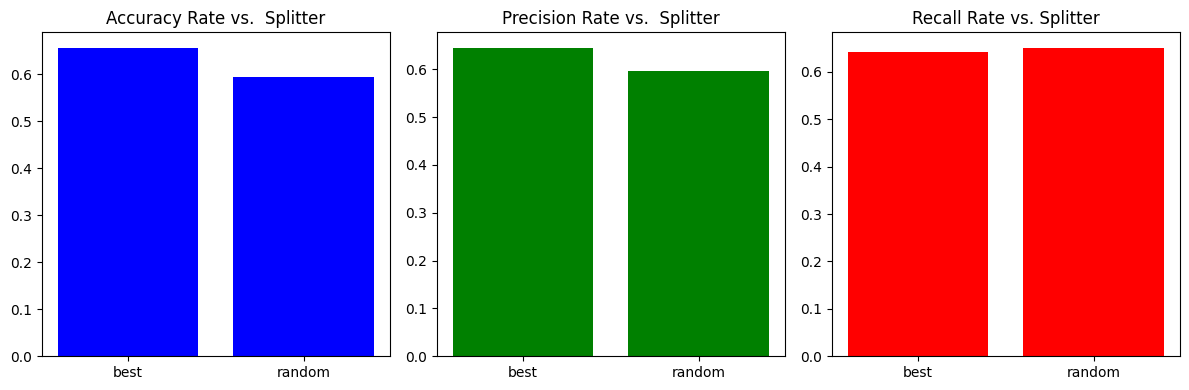

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].bar(split_class, accuracy_rate, color='blue')
axes[0].set_title('Accuracy Rate vs.  Splitter')

# Plot the second bar plot on the second subplot
axes[1].bar(split_class, precision_rate, color='green')
axes[1].set_title('Precision Rate vs.  Splitter')

# Plot the third bar plot on the third subplot
axes[2].bar(split_class, recall_rate, color='red')
axes[2].set_title('Recall Rate vs. Splitter')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
print(f'splitter <{split_class[np.argmax(accuracy_rate)]}> with accuracy rate of {np.max(accuracy_rate)}')
print(f'splitter <{split_class[np.argmax(precision_rate)]}> with precision rate of {np.max(precision_rate)}')
print(f'splitter <{split_class[np.argmax(recall_rate)]}> with precision rate of {np.max(recall_rate)}')
best_splitter = split_class[np.argmax(accuracy_rate)]

splitter <best> with accuracy rate of 0.656
splitter <best> with precision rate of 0.6448122766156423
splitter <random> with precision rate of 0.6507294239033657


### max_depth

In [100]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))


C:\Users\mojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


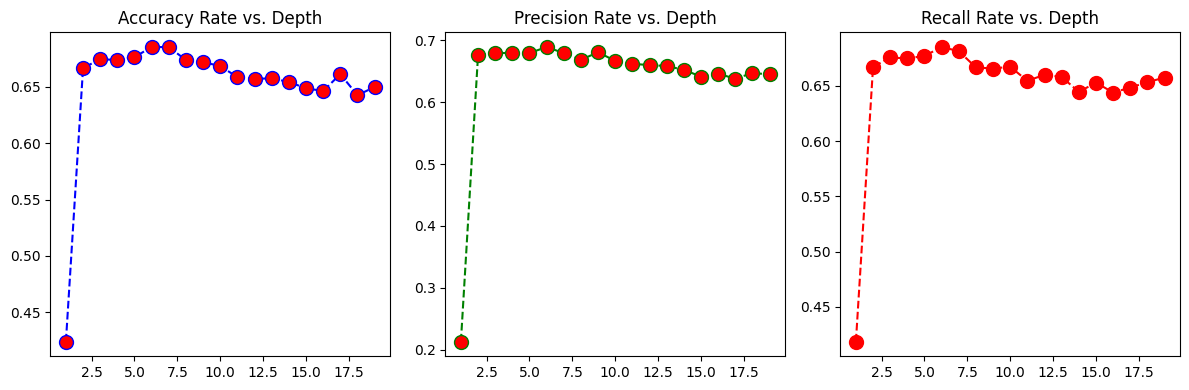

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Depth')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Depth')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Depth')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [102]:
print(f'max_depth {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_depth {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'max_depth {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')
best_max_depth = np.argmax(accuracy_rate)

if best_max_depth == 0:
    best_max_depth = np.argsort(accuracy_rate)[1]

max_depth 5 with accuracy rate of 0.6853333333333333
max_depth 5 with precision rate of 0.6890961293345255
max_depth 5 with recall rate of 0.685121930714063


### max_features int, float or {“auto”, “sqrt”, “log2”}, default=None

In [94]:
# accuracy
accuracy_rate = []
max_features = ['sqrt', 'log2']
for i in max_features:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6
                                 , max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))



# precision
precision_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

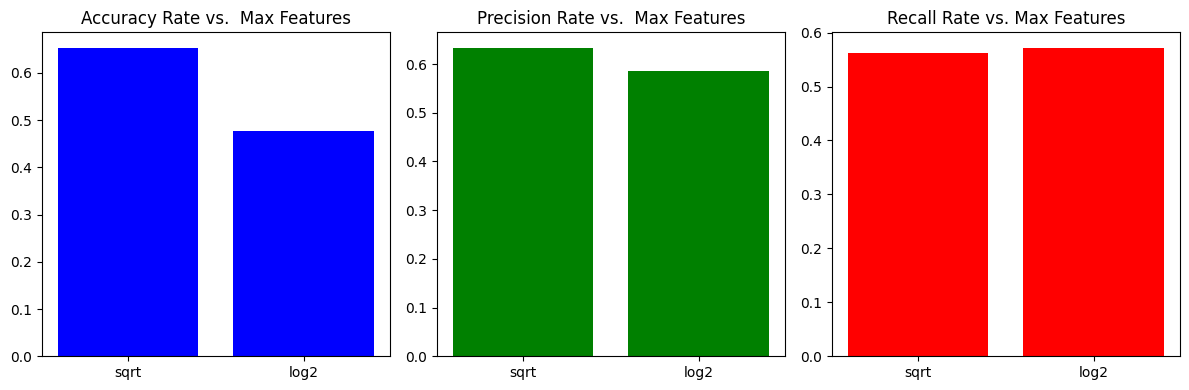

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].bar(max_features, accuracy_rate, color='blue')
axes[0].set_title('Accuracy Rate vs.  Max Features')

# Plot the second bar plot on the second subplot
axes[1].bar(max_features, precision_rate, color='green')
axes[1].set_title('Precision Rate vs.  Max Features')

# Plot the third bar plot on the third subplot
axes[2].bar(max_features, recall_rate, color='red')
axes[2].set_title('Recall Rate vs. Max Features')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [96]:
print(f'max_features {max_features[np.argmax(accuracy_rate)]} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_features {max_features[np.argmax(precision_rate)]} with precision rate of {np.max(precision_rate)}')
print(f'max_features {max_features[np.argmax(recall_rate)]} with recall rate of {np.max(recall_rate)}')
best_max_features = max_features[np.argmax(accuracy_rate)]

max_features sqrt with accuracy rate of 0.6533333333333333
max_features sqrt with precision rate of 0.6335660350053341
max_features log2 with recall rate of 0.5719056763309722


### min_samples_leaf

In [97]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, max_features='log2', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, max_features='log2', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, max_features='log2', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

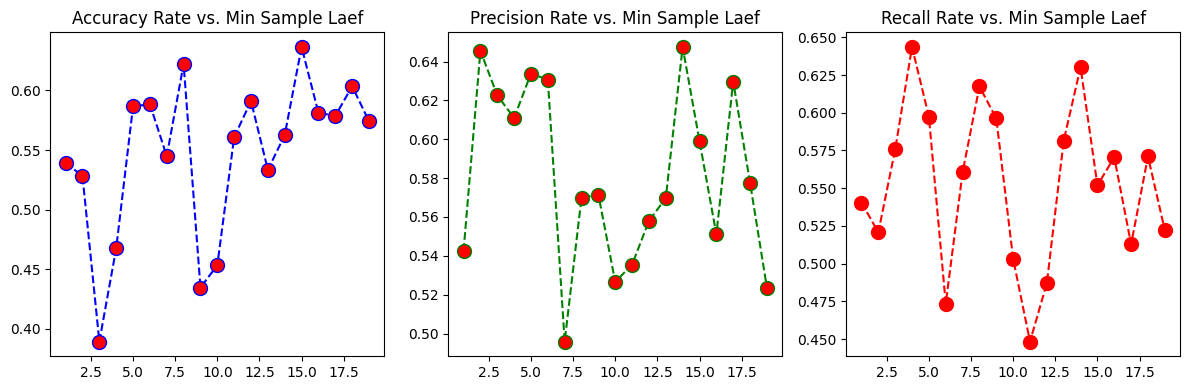

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Min Sample Laef')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Min Sample Laef')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Min Sample Laef')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
print(f'min_sample_leaf {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'min_sample_leaf {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'min_sample_leaf {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')
best_min_samples_leaf = np.argmax(accuracy_rate)
if best_min_samples_leaf == 0:
    best_min_samples_leaf = 1

min_sample_leaf 14 with accuracy rate of 0.6364444444444445
min_sample_leaf 13 with precision rate of 0.647452521669524
min_sample_leaf 3 with recall rate of 0.6435272257734906


In [100]:
clf = DecisionTreeClassifier(criterion='entropy', splitter=best_splitter, max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_score(y_test, pred)

0.5555555555555556

# Log-loss

### splitter

In [101]:
# accuracy
accuracy_rate = []
split_class = ['best', 'random']
for i in split_class:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))



# precision
precision_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in split_class:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

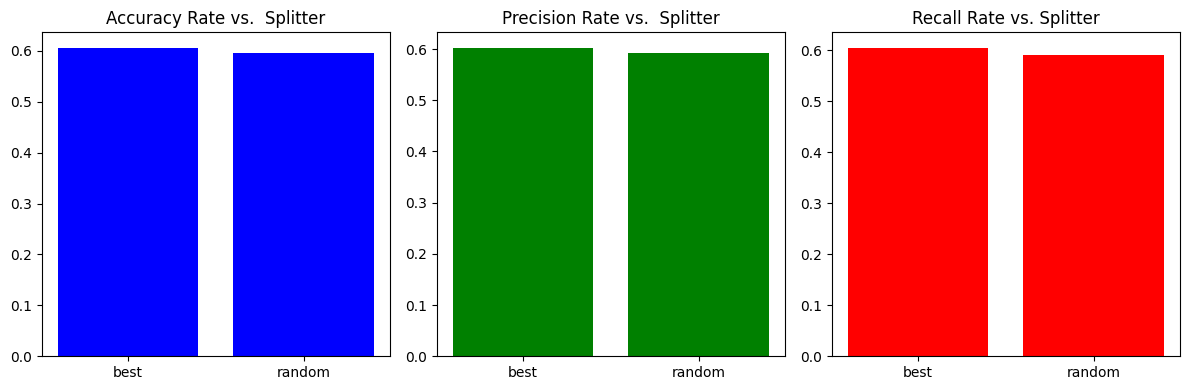

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].bar(split_class, accuracy_rate, color='blue')
axes[0].set_title('Accuracy Rate vs.  Splitter')

# Plot the second bar plot on the second subplot
axes[1].bar(split_class, precision_rate, color='green')
axes[1].set_title('Precision Rate vs.  Splitter')

# Plot the third bar plot on the third subplot
axes[2].bar(split_class, recall_rate, color='red')
axes[2].set_title('Recall Rate vs. Splitter')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [103]:
print(f'splitter <{split_class[np.argmax(accuracy_rate)]}> with accuracy rate of {np.max(accuracy_rate)}')
print(f'splitter <{split_class[np.argmax(precision_rate)]}> with precision rate of {np.max(precision_rate)}')
print(f'splitter <{split_class[np.argmax(recall_rate)]}> with precision rate of {np.max(recall_rate)}')
best_splitter = split_class[np.argmax(accuracy_rate)]

splitter <best> with accuracy rate of 0.6062222222222222
splitter <best> with precision rate of 0.60248627223586
splitter <best> with precision rate of 0.6050766642557028


### max_depth

In [104]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))


C:\Users\mojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


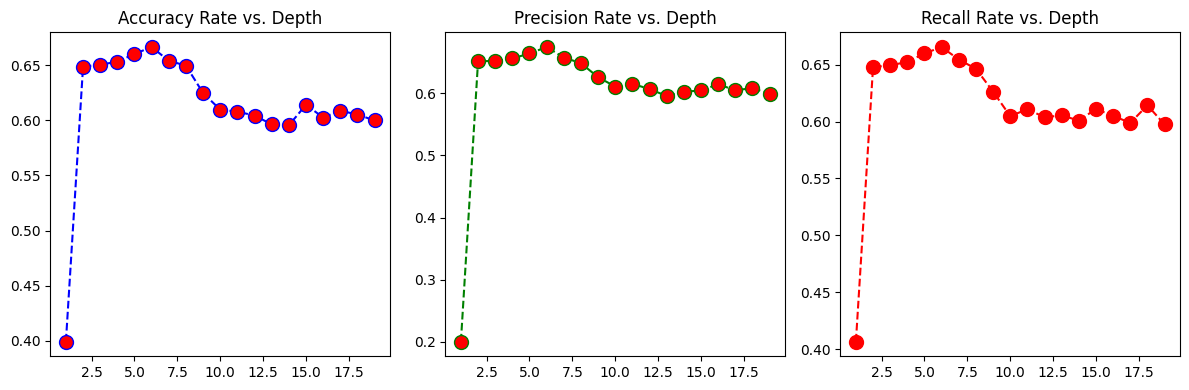

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Depth')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Depth')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Depth')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [106]:
print(f'max_depth {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_depth {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'max_depth {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')
best_max_depth = np.argmax(accuracy_rate)
if best_max_depth == 0:
    best_max_depth = np.argsort(accuracy_rate)[1]

max_depth 5 with accuracy rate of 0.6666666666666666
max_depth 5 with precision rate of 0.6744065526000627
max_depth 5 with recall rate of 0.6653910891923881


### max_features int, float or {“auto”, “sqrt”, “log2”}, default=None

In [107]:
# accuracy
accuracy_rate = []
max_features = ['sqrt', 'log2']
for i in max_features:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=15, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))



# precision
precision_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=15, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in max_features:
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=15, max_features=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

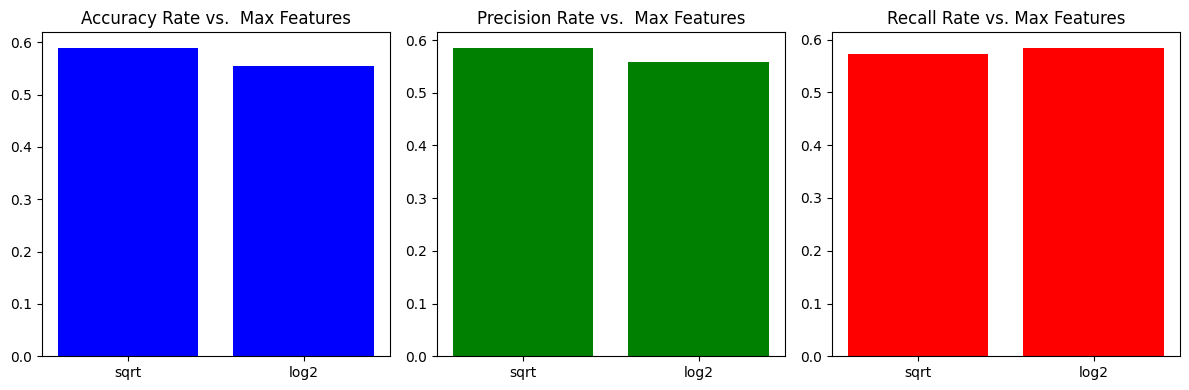

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].bar(max_features, accuracy_rate, color='blue')
axes[0].set_title('Accuracy Rate vs.  Max Features')

# Plot the second bar plot on the second subplot
axes[1].bar(max_features, precision_rate, color='green')
axes[1].set_title('Precision Rate vs.  Max Features')

# Plot the third bar plot on the third subplot
axes[2].bar(max_features, recall_rate, color='red')
axes[2].set_title('Recall Rate vs. Max Features')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [109]:
print(f'max_features {max_features[np.argmax(accuracy_rate)]} with accuracy rate of {np.max(accuracy_rate)}')
print(f'max_features {max_features[np.argmax(precision_rate)]} with precision rate of {np.max(precision_rate)}')
print(f'max_features {max_features[np.argmax(recall_rate)]} with recall rate of {np.max(recall_rate)}')
best_max_features = max_features[np.argmax(accuracy_rate)]

max_features sqrt with accuracy rate of 0.5893333333333334
max_features sqrt with precision rate of 0.5853045027098811
max_features log2 with recall rate of 0.5847082105876473


### min_samples_leaf

In [110]:
# accuracy
accuracy_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=6, max_features='sqrt', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, pred))

 

# precision
precision_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=6, max_features='sqrt', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    precision_rate.append(precision_score(y_test, pred, average='macro'))




# recall
recall_rate = []
for i in range(1,20):
    clf = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=6, max_features='sqrt', min_samples_leaf=i)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    recall_rate.append(recall_score(y_test, pred, average='macro'))

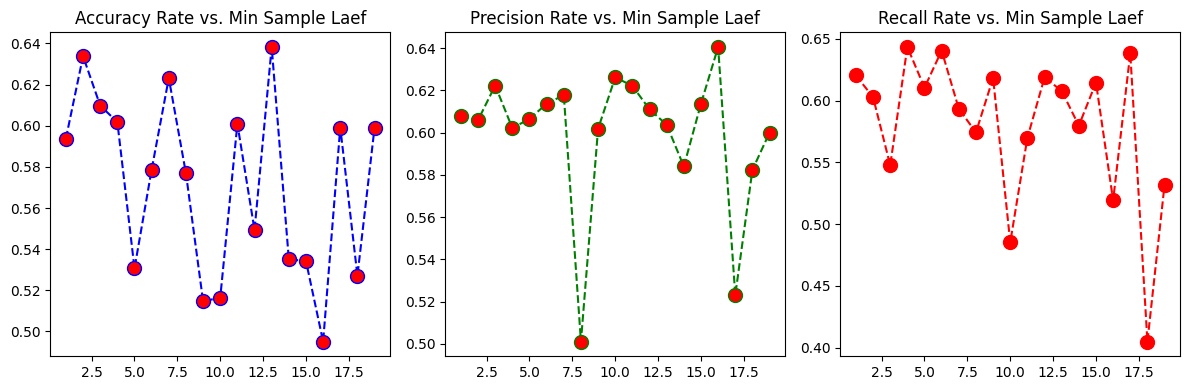

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first bar plot on the first subplot
axes[0].plot(range(1,20), accuracy_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[0].set_title('Accuracy Rate vs. Min Sample Laef')

# Plot the second bar plot on the second subplot
axes[1].plot(range(1,20), precision_rate, color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[1].set_title('Precision Rate vs. Min Sample Laef')

# Plot the third bar plot on the third subplot
axes[2].plot(range(1,20), recall_rate, color='red', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
axes[2].set_title('Recall Rate vs. Min Sample Laef')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [112]:
print(f'min_sample_leaf {np.argmax(accuracy_rate)} with accuracy rate of {np.max(accuracy_rate)}')
print(f'min_sample_leaf {np.argmax(precision_rate)} with precision rate of {np.max(precision_rate)}')
print(f'min_sample_leaf {np.argmax(recall_rate)} with recall rate of {np.max(recall_rate)}')
best_min_samples_leaf = np.argmax(accuracy_rate)
if best_min_samples_leaf == 0:
    best_min_samples_leaf = 1

min_sample_leaf 12 with accuracy rate of 0.6382222222222222
min_sample_leaf 15 with precision rate of 0.6405106471477193
min_sample_leaf 3 with recall rate of 0.6434703824570807


In [113]:
clf = DecisionTreeClassifier(criterion='log_loss', splitter=best_splitter, max_depth=best_max_depth, max_features=best_max_features, 
                             min_samples_leaf=best_min_samples_leaf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_score(y_test, pred)

0.6391111111111111